# Homework 5

### Cameron Bale

This homework assignment is all about dimensionality reduction and clustering. I'll be working with the MNIST dataset, which is a bunch of handrawn digits from 0-9. Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The goal of this notebook will be to correctly identify and classify each handrawn digit.

This notebook will be divided into five portions:

1) Data Cleaning/Exploration

2) PCA

3) t-SNE

4) K-Means Clustering

5) Hierarchical Clustering

***

## Part 1: Data Cleaning/Exploration

I'll start by cleaning and exploring the data from GitHub.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import fetch_mldata
import warnings
warnings.filterwarnings('ignore')

train_gh = pd.read_csv("C:/Users/camer/Desktop/Machine_Learning/digit_train.csv")

In [2]:
train_gh.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Looks like the data imported correctly.

In [3]:
train_gh.isnull().sum().sort_values(ascending = False).head(5)

pixel783    0
pixel267    0
pixel265    0
pixel264    0
pixel263    0
dtype: int64

Thankfully, there are no missing values!

In [4]:
train_gh.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [5]:
print('The maximum pixel value is', max(train_gh.max()))
print('The minimum pixel value is', min(train_gh.min()))

The maximum pixel value is 255
The minimum pixel value is 0


All of the actual data values are within the appropriate pixel range, 0 to 255 and the target variable is in the proper range, 0 to 9.

In [6]:
train_gh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


Looks like all the data was imported as the correct type. The MNIST dataset appears to be in good condition to analyze. I'll proceed with the PCA portion of this assignment, but I'll use the full original MNIST dataset because it has more observations. :)

In [7]:
mnist = fetch_mldata('MNIST original')
train = mnist.data
target = mnist.target

In [8]:
train.shape

(70000, 784)

The full MNIST dataset has 70,000 observations vs. 42,000.

***

## Part 2: PCA

I'm going to perform PCA such that it preserves enough orthogonal features to explain 95% of the original variance in the data.

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)
train_pca = pca.fit_transform(train)

I'll also create an array of the data that has been inverse transformed after having PCA applied to it to use for visualization.

In [10]:
approximation = pca.inverse_transform(train_pca)
train_pca.shape

(70000, 154)

I now have 154 components. I am using 154 because these features explain 95% of the original variance in the data while reducing the feature size significantly: from 785 to 154. Let's see what projecting our data onto the first two components looks like.

Text(0.5,1,'Projection Onto 1st Component')

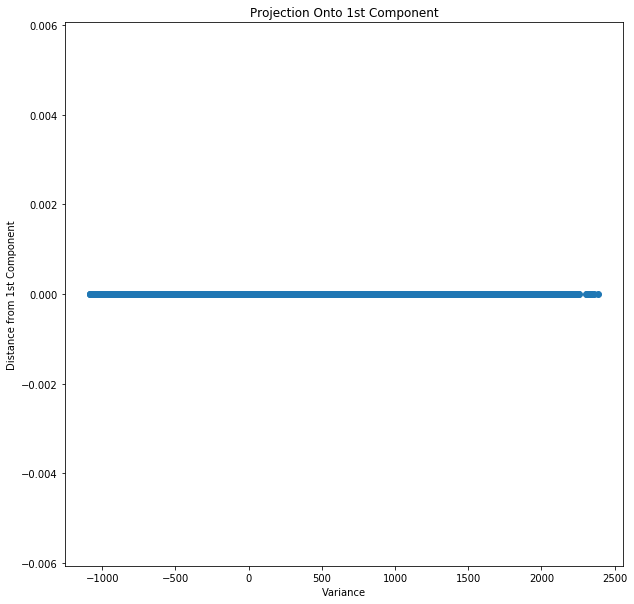

In [11]:
f, ax = plt.subplots(figsize=(10, 10))
plt.scatter(train_pca[:,0], np.zeros(len(train_pca[:,0])))
plt.xlabel('Variance')
plt.ylabel('Distance from 1st Component')
plt.title('Projection Onto 1st Component')

Text(0.5,1,'Projection Onto 2nd Component')

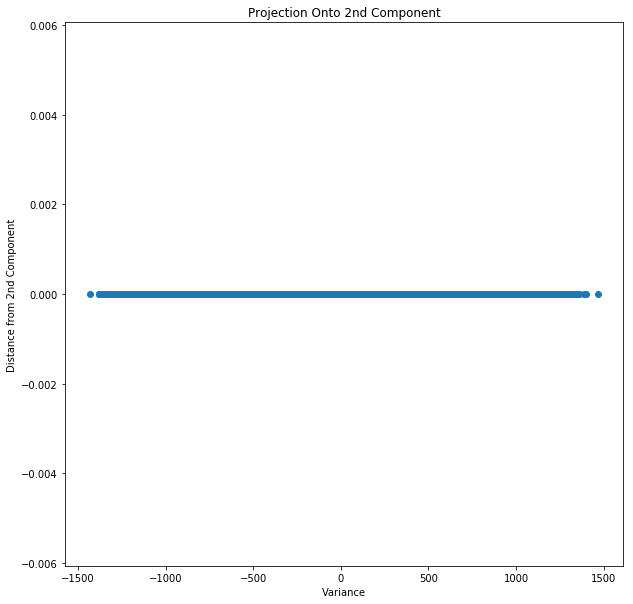

In [12]:
f, ax = plt.subplots(figsize=(10, 10))
plt.scatter(train_pca[:,1], np.zeros(len(train_pca[:,1])))
plt.xlabel('Variance')
plt.ylabel('Distance from 2nd Component')
plt.title('Projection Onto 2nd Component')

The first component has a bit more variance than the second. But overall, both of these components have a large amount of variance based on the scale of the data.

Text(0.5,1,'Scatter Plot of 1st and 2nd Components')

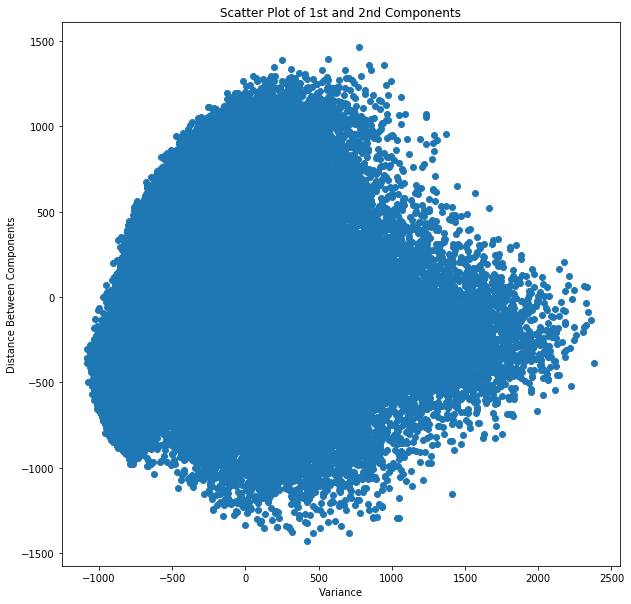

In [13]:
f, ax = plt.subplots(figsize=(10, 10))
plt.scatter(train_pca[:,0], train_pca[:,1])
plt.xlabel('Variance')
plt.ylabel('Distance Between Components')
plt.title('Scatter Plot of 1st and 2nd Components')

There may be a slight positive trend. Most of the data is clustered at or below 1000, with some points extending out in a sort of tail up toward 2500. Additionally, the data seems to be most densely clustered from -500 - 500, and as you move out from there it becomes less dense with some possible outliers at the outside edge of the cloud.

PCA is useful to reduce the number of features you have in your data. This makes the data easier to work with, and it helps us to avoid the curse of dimensionality. This occurs when you have so many features and your data live in such a high dimensional space that the distance between points is about the same as the average distance so that there isn't an easy way to classify points or make predictions without extreme overfitting.

The way this is achieved is that PCA projects the data onto the axis with the most variance. Then, it projects the data onto the axis with the next most variance that is orthogonal to the first. It then projects the data onto the axis with the next most variance that is orthogonal to the first two. It does this until you reach the specified number of components or once a certain amount of variance is explained by the components. Components are actually found using SVD, which is a matrix decomposition technique, where the matrix that is decomposed is our data. The columns of one of the matrices that constitute the decomposition are the components.

There are some limitations/disadvantages of PCA, however. One is that PCA assumes that principle components are linear combinations of the original features. If this doesn't hold, then PCA doesn't produce sensible results. PCA uses variance as a measure of feature importance, so high variance axis are treated as important and low variance are not. If none of your features have much variance PCA won't be very useful. You also lose the ability to interpret the importance of individual features after performing PCA. You also have to make sure your data is on the same scale or PCA will put too much weight on larger scale features.

Now I'll graph some of the original figures and some figures after applying PCA and see how PCA affects the visibility of the numbers.

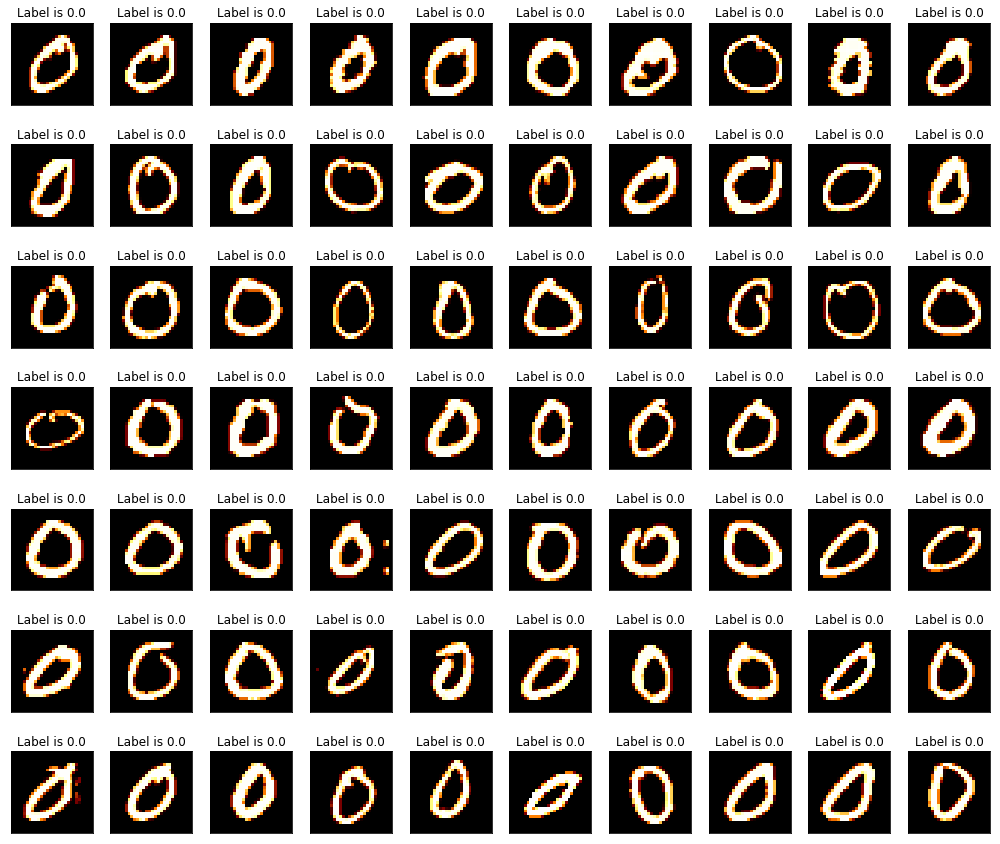

In [14]:
plt.figure(figsize=(14,12))

for i in range(70):
    
    plt.subplot(7,10,i+1)

    image = train[i]

    pixels = np.array(image, dtype='uint8')

    pixels = pixels.reshape((28, 28))

    plt.title('Label is {label}'.format(label=target[i]))
    plt.imshow(pixels, interpolation = "none", cmap = "afmhot")
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()

These images were created using the original data with 784 features. Here we can see a bunch of zeros plotted. They look pretty clear.

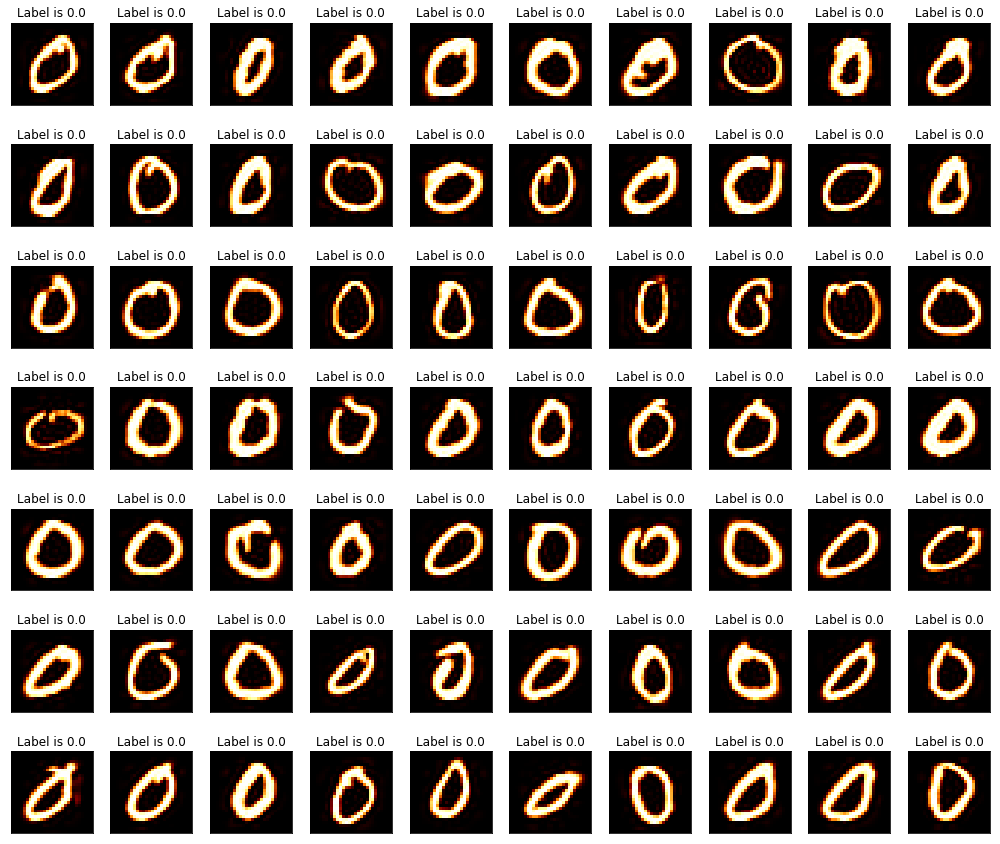

In [15]:
plt.figure(figsize=(14,12))

for i in range(70):
    
    plt.subplot(7,10,i+1)

    plt.imshow(approximation[i].reshape(28, 28),
                  cmap = "afmhot", interpolation='nearest',
                  clim=(0, 255))
    plt.title('Label is {label}'.format(label=target[i]))
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()

Here are those same zeros plotted using the reduced data with 154 features. Clearly we haven't lost very much image interpretability.

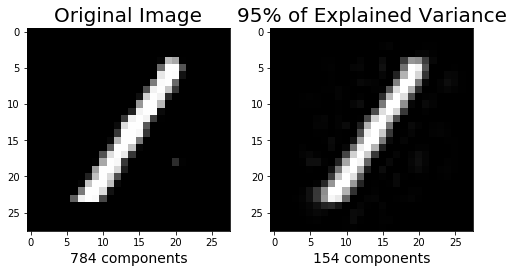

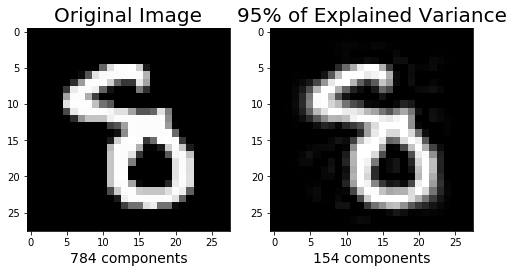

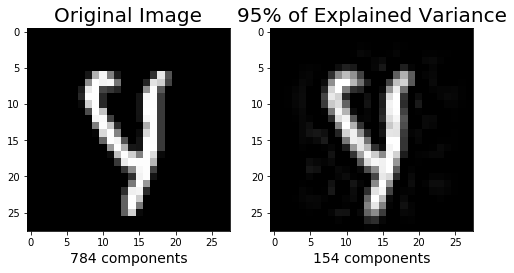

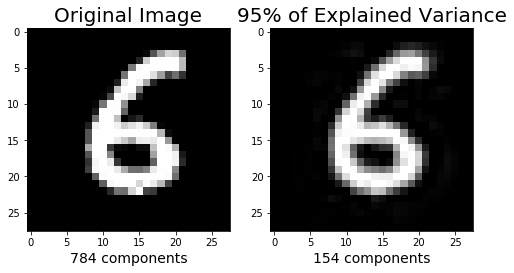

In [16]:
images = [10000, 50000, 25000, 37000]

for i in images:
    plt.figure(figsize=(8,4));

    # Original Image
    plt.subplot(1, 2, 1);
    plt.imshow(train[i].reshape(28,28),
                  cmap = plt.cm.gray, interpolation='nearest',
                  clim=(0, 255));
    plt.xlabel('784 components', fontsize = 14)
    plt.title('Original Image', fontsize = 20);

    # 154 principal components
    plt.subplot(1, 2, 2);
    plt.imshow(approximation[i].reshape(28, 28),
                  cmap = plt.cm.gray, interpolation='nearest',
                  clim=(0, 255));
    plt.xlabel('154 components', fontsize = 14)
    plt.title('95% of Explained Variance', fontsize = 20);

Here are 4 more random digits plotted larger for easier comparison. The original images look great, and the PCA images look quite similar. It's pretty impressive that only 154 of the original components can render an image that looks so similar to one with 784 components. It would appear that you really don't lose much at all when reducing the size of your data using PCA.

***

## Part 3: t-SNE

I'll use t-SNE to plot the first two components. t-SNE reduces the dimensionality of the data down to 2 so that we can visualize the data in a better, more comprehensible way.

In [17]:
from sklearn.manifold import TSNE

rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(train_pca[rows[:n_select],:])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.125s...
[t-SNE] Computed neighbors for 10000 samples in 46.584s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 415.584491
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.617386
[t-SNE] Error after 1000 iterations: 1.732556


In [18]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = target[rows[:n_select]]

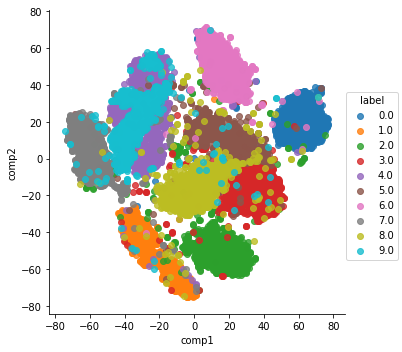

In [19]:
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

The t-SNE plot shows a visualization of the data as a whole, and how it can be grouped. This is different from a PCA plot since the PCA plot I made is not grouped at all. Additionally, PCA is focused on variance and the distance between observations, while distance doesn't mean anything in t-SNE. t-SNE does a pretty good job visualizing and grouping the different target values, although it does get confused. I am colorblind, so this might not be right, but it looks like there is a lot of overlap between 4's and 9's.

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.098s...
[t-SNE] Computed neighbors for 10000 samples in 43.176s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 332.331266
[t-SNE] KL divergence after 250 iterations with early exaggeration: 92.739258
[t-SNE] Error after 1000 iterations: 1.959743


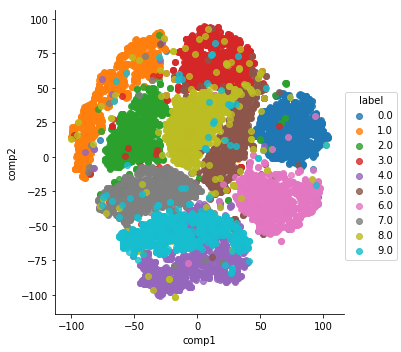

In [20]:
tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(train_pca[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = target[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

The previous iteration of t-SNE performed quite well. You can clearly see 10 distinct clusters. For this problem, lowering the perplexity seems to have helped the algorithm to converge better. The t-SNE documentation says that t-SNE is fairly robust to changes in perplexity, but it seems to have had a fairly significant effect in this case.

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.102s...
[t-SNE] Computed neighbors for 10000 samples in 46.461s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 415.584491
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.617432
[t-SNE] Error after 350 iterations: 2.281812


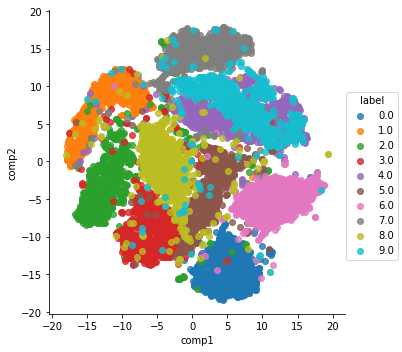

In [21]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=350, learning_rate=200)
tsne_results = tsne.fit_transform(train_pca[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = target[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

The t-SNE held up under a large decrease in iterations and was still able to produce a plot with mostly separated clusters. However, I still prefer the plot prior to this since there aren't any large overlaps in the clusters.

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.110s...
[t-SNE] Computed neighbors for 10000 samples in 46.469s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 415.584491
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.615005
[t-SNE] Error after 1000 iterations: 1.707524


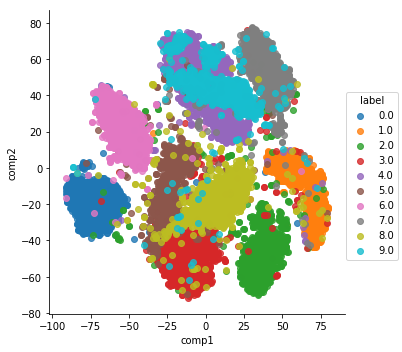

In [22]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=600)
tsne_results = tsne.fit_transform(train_pca[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = target[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

Finally, t-SNE was robust to a large change in learning rate. There are still well separated clusters, but the best plot I saw was when I reduced the perplexity to 10. In this plot, we can see that there is still a tendency to confuse 4 and 9.

## Part 4: K-Means Clustering

To start, I'll perform k-means using a bunch of different k values and plot there sum of squared distances to see at what point the marginal decrease in sum of squared distances is reduced. (the kink point)

Text(0.5,1,'Elbow Plot')

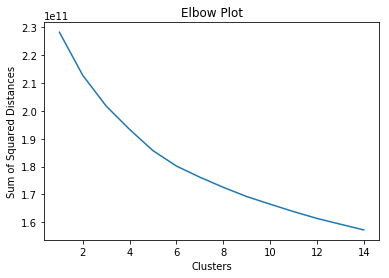

In [23]:
from sklearn.cluster import KMeans

sses = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k, n_init=50, n_jobs=-1)
    kmeans.fit(train_pca)
    sses.append(kmeans.inertia_)
plt.plot(range(1,15), sses)
plt.xlabel('Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Plot')

Although the elbow plot is still steadily decreasing out to 15, I'm going to choose 10 for k since there are only 10 possible digits in the data. (0 - 9)

In [24]:
kmeans = KMeans(n_clusters=10, n_init=50, n_jobs=-1)
kmeans.fit(train_pca)
digit_clusters = kmeans.predict(train_pca)

In [25]:
#from sklearn.metrics import silhouette_score

#kmeans_model = KMeans(n_clusters=10, n_init=50, n_jobs=-1)
#kmeans_model = kmeans_model.fit(train_pca)
#labels = kmeans_model.labels_
#silhouette_score(train_pca, labels, metric='euclidean')

I would have liked to evaluate my clustering using silhouette score but I get a memory error when I try. So, I'll evaluate using other methods. As far as scaling goes, my gut tells me I shouldn't scale since the distances between values in the data represent the lightness/darkness of each pixel. Changing the scale could distort the images. But, I'll try clustering the data with and without scaling and see what happens.

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)

pca = PCA(n_components = 0.95)
train_scaled_pca = pca.fit_transform(train_scaled)

I'll try evaluating my clustering using homogeneity, completeness, and V-measure. Homogeneity measures whether each cluster only contains members of a single class. Completeness measures whether all members of a class are assigned to the same cluster. Both homogeneity and completness are bounded by 0 and 1 where the closer you are to 1 the better. V-measure is a harmonic mean where perfect labeling is scored as 1.0.

In [27]:
from sklearn import metrics

metrics.homogeneity_completeness_v_measure(target, digit_clusters)

(0.49610073107879027, 0.5035319270754318, 0.49978870759361405)

The k-means clustering on data that is not scaled seems to be pretty average, sitting right in the middle of the 0 - 1 scale for all three evaluation methods. Lets see how the clustering performs on the scaled data.

In [28]:
kmeans = KMeans(n_clusters=10, n_init=50, n_jobs=-1)
kmeans.fit(train_scaled_pca)
digit_clusters_scaled = kmeans.predict(train_scaled_pca)

In [29]:
metrics.homogeneity_completeness_v_measure(target, digit_clusters_scaled)

(0.41982396580035036, 0.44201311364752205, 0.43063289508533514)

The clustering on the scaled data actually performed worse than on the regular data, which is what I expected since the distances between points actually mean something for this dataset. Now I'll visualize my clusters using t-SNE.

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.158s...
[t-SNE] Computed neighbors for 10000 samples in 43.401s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 332.331266
[t-SNE] KL divergence after 250 iterations with early exaggeration: 92.635017
[t-SNE] Error after 1000 iterations: 1.953635


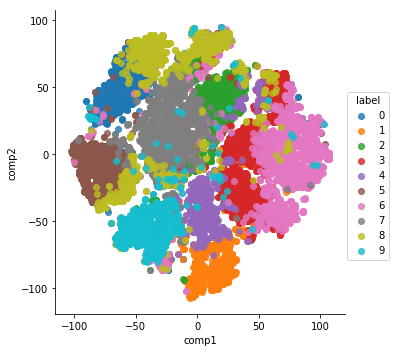

In [30]:
tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(train_pca[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = digit_clusters[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

Unfortunately, there is a lot of overlap between clusters. That's why the homogeneity and completeness scores were not very high. K-means clustering is also not very robust, as small changes in data can lead to large changes in the clustering outcomes. And just to review, the clustering did not perform well after scaling the data, so I left the data in its original form. Now I'll move on to hierarchical clustering.

## Part 5: Hierarchical Clustering

To start with hierarchical clustering, I'll apply it to a subset of the training data using the complete linkage method, which measures the distance between clusters based on the maximum distance between points in clusters.

In [31]:
idx = np.random.randint(42000, size=75)
dend_selection = train_pca[idx,:]

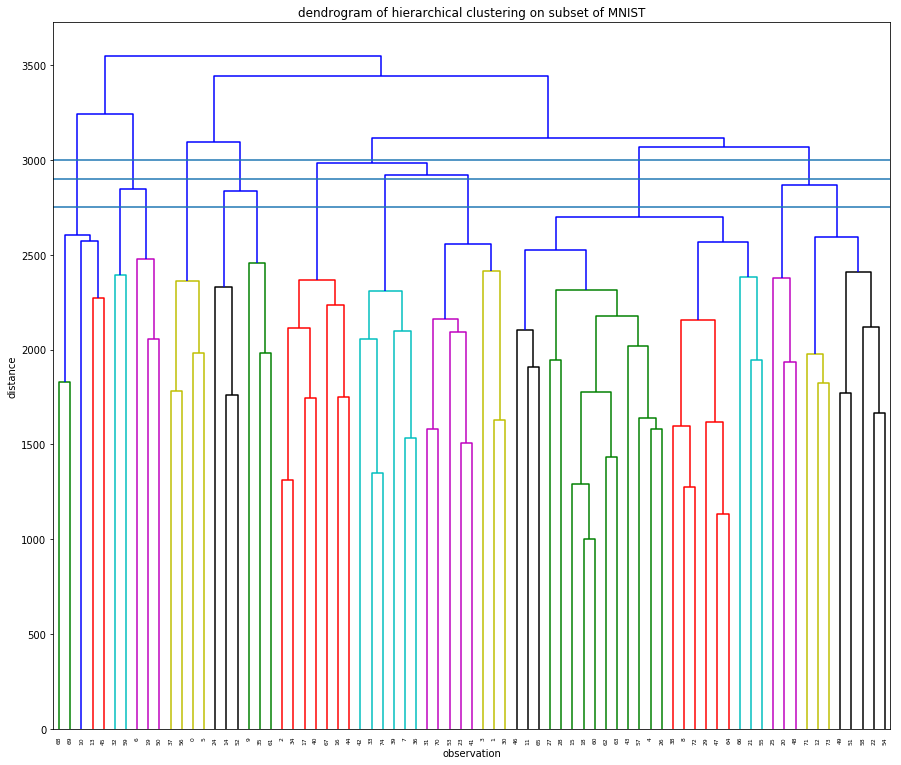

In [41]:
from scipy.cluster.hierarchy import dendrogram, linkage

hierarchy = linkage(dend_selection, 'complete')
plt.figure(figsize=(15, 13))
plt.xlabel('observation')
plt.ylabel('distance')
plt.title('dendrogram of hierarchical clustering on subset of MNIST')
plt.axhline(y=3000)
plt.axhline(y=2750)
plt.axhline(y=2900)
_ = dendrogram(hierarchy)

Based on this plot, 7 - 12 clusters seems reasonable based on where you draw the height cutoff. This makes sense since there really should be 10 clusters in the data. I've drawn 3 different cutoff points on the dendrogram that seem reasonable. Based on my knowledge of the data, I would choose the line in the middle since it produces 9 clusters which is closest to 10.

Now I'll examine a dendrogram using a different linkage method.

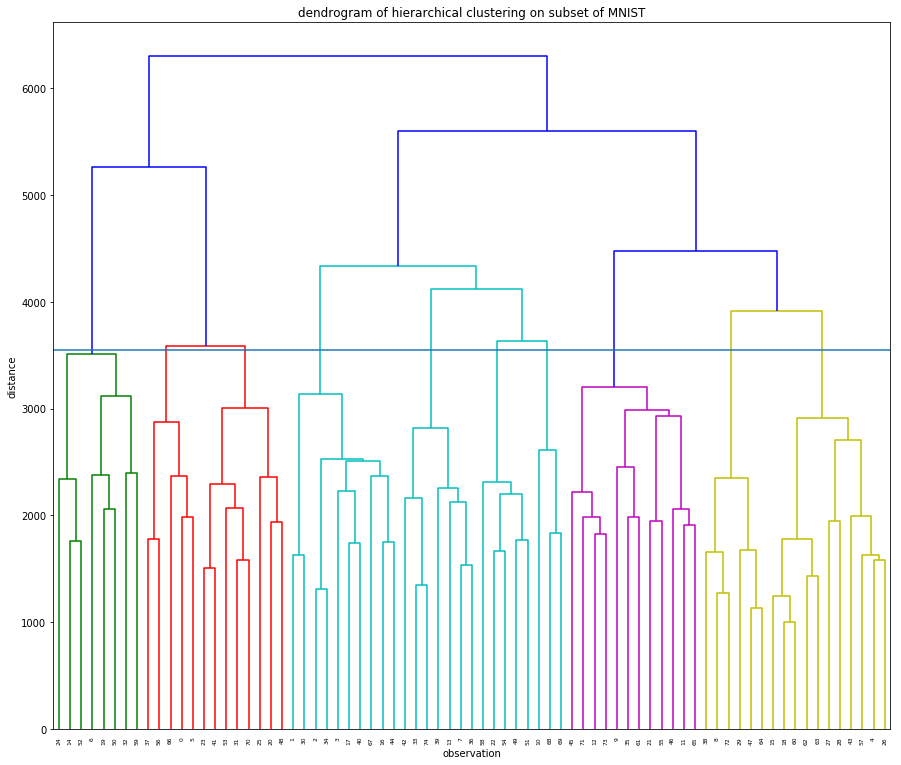

In [48]:
hierarchy = linkage(dend_selection, 'ward')
plt.figure(figsize=(15, 13))
plt.xlabel('observation')
plt.ylabel('distance')
plt.title('dendrogram of hierarchical clustering on subset of MNIST')
plt.axhline(y=3550)
_ = dendrogram(hierarchy)

In the plot above, you can see that at the horizontal line we get exactly 10 clusters. The dendrogram changes significantly based on which linkage method you choose. In my opinion, this is the best dendrogram and it was created using the 'ward' linkage method, which merges the two clusters that minimize the total within-cluster variance after merging.

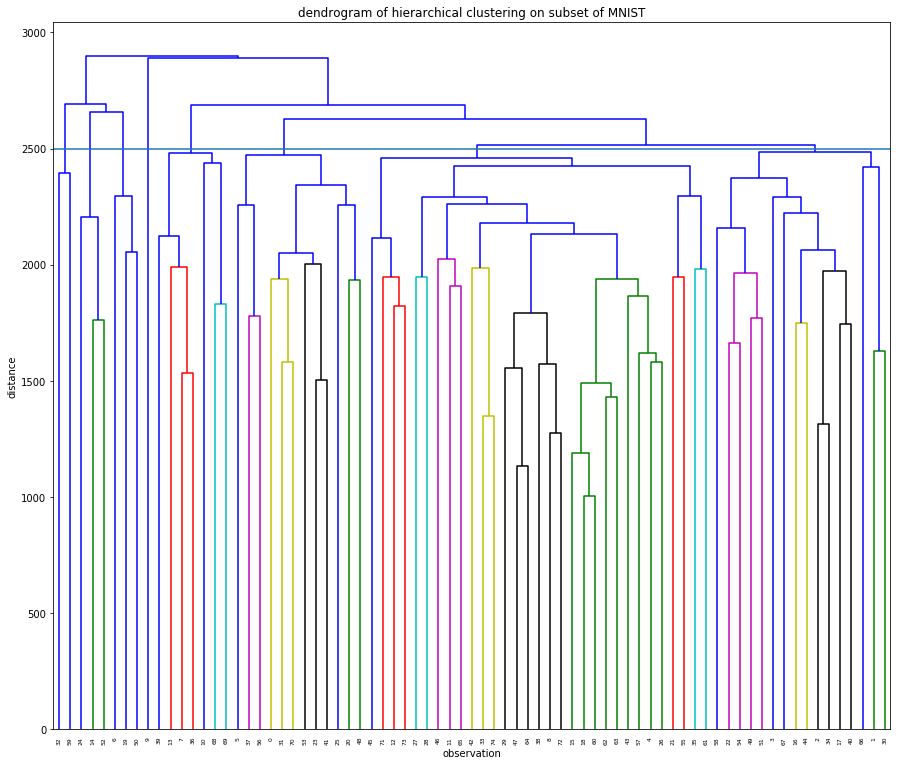

In [49]:
hierarchy = linkage(dend_selection, 'average')
plt.figure(figsize=(15, 13))
plt.xlabel('observation')
plt.ylabel('distance')
plt.title('dendrogram of hierarchical clustering on subset of MNIST')
plt.axhline(y=2500)
_ = dendrogram(hierarchy)

In this final dendrogram, which is a lot messier than the others, I've drawn a line at the point where we get 8 clusters. This linkage method, 'average', uses the average distance between points in clusters. In my opinion, this linkage method has performed poorly because there is not a lot of distance with which you can effectively differentiate clusters.

Thanks to Tyler Folkman, Anisotropic, and mGalarnyk. I referenced the following notebooks for this assignment:

https://www.kaggle.com/arthurtok/interactive-intro-to-dimensionality-reduction

https://github.com/tfolkman/byu_econ_applied_machine_learning/blob/master/lectures/Lecture_12_Dimensionality%20Reduction.ipynb

https://github.com/tfolkman/byu_econ_applied_machine_learning/blob/master/lectures/Lecture_13_Clustering.ipynb

https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_Image_Reconstruction_and_such.ipynb